# NEWS CLASSIFICATION

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


### The Dataset : NewsDataset.json news=2,00,853

In [2]:
allNews = pd.read_json('NewsDataset.json',lines=True)

In [3]:
allNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
authors              200853 non-null object
category             200853 non-null object
date                 200853 non-null datetime64[ns]
headline             200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [4]:
allNews.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [5]:
allNews.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199344,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://highline....,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


#### Dropping The Unwanted Features from the dataset

In [6]:
droplist=['authors','date','link']
for todrop in droplist:
    allNews = allNews.drop(todrop,1)

In [7]:
allNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 3 columns):
category             200853 non-null object
headline             200853 non-null object
short_description    200853 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [8]:
allNews.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [9]:
allNews.columns

Index(['category', 'headline', 'short_description'], dtype='object')

In [10]:
allNews.columns=['CATEGORY','TITLE','DESC']

In [11]:
allNews.head()

,CATEGORY,TITLE,DESC
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


In [12]:
allNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 3 columns):
CATEGORY    200853 non-null object
TITLE       200853 non-null object
DESC        200853 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [13]:
labels_of_news=[]
x = allNews['CATEGORY'].value_counts()
for i in x.index:
    labels_of_news.append(i)

In [14]:
allNews['CATEGORY'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: CATEGORY, 

In [15]:
print("value_counts",len(allNews['CATEGORY'].value_counts()))
print("label_of_news",len(labels_of_news))

value_counts 41
label_of_news 41


In [16]:
labels_of_news

['POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'TRAVEL',
 'STYLE & BEAUTY',
 'PARENTING',
 'HEALTHY LIVING',
 'QUEER VOICES',
 'FOOD & DRINK',
 'BUSINESS',
 'COMEDY',
 'SPORTS',
 'BLACK VOICES',
 'HOME & LIVING',
 'PARENTS',
 'THE WORLDPOST',
 'WEDDINGS',
 'WOMEN',
 'IMPACT',
 'DIVORCE',
 'CRIME',
 'MEDIA',
 'WEIRD NEWS',
 'GREEN',
 'WORLDPOST',
 'RELIGION',
 'STYLE',
 'SCIENCE',
 'WORLD NEWS',
 'TASTE',
 'TECH',
 'MONEY',
 'ARTS',
 'FIFTY',
 'GOOD NEWS',
 'ARTS & CULTURE',
 'ENVIRONMENT',
 'COLLEGE',
 'LATINO VOICES',
 'CULTURE & ARTS',
 'EDUCATION']

- Checking the category and their title and description

In [17]:
wellness = allNews.loc[allNews['CATEGORY'] == "WELLNESS"]
wellness.head() #Remove it 

,CATEGORY,TITLE,DESC
124989,WELLNESS,Why Overeating Doesn't Make You Fat,If you take the right approach to ending your ...
124990,WELLNESS,14 Habits Of People With A Healthy Relationshi...,After a long list of rules and habits like the...
124993,WELLNESS,5 Things That Could Be Stealing Your Joy,Listen to yourself all day today -- are you an...
124994,WELLNESS,Moments Make a Life,Consciously constructing positive habits -- or...
124996,WELLNESS,Fat Facts,"Human fat cells, photo by Dr. Peeke Here's how..."


In [18]:
parent =  allNews.loc[allNews['CATEGORY'] == "PARENTS"]
parent.head() # remove it 


,CATEGORY,TITLE,DESC
6194,PARENTS,40 Tweets That Sum Up Life With 4-Year-Olds,"""Hell hath no fury like a 4yo whose apple slic..."
6524,PARENTS,These Were The Trendiest Baby Names In The Lat...,Shout out to the Jessicas and Ambers of the wo...
6625,PARENTS,"These Quotes From Kids Are Hilarious, Adorable...","""Mommy, this song sounds a lot like the McDonn..."
6848,PARENTS,30 'Star Wars'-Inspired Names Parents Are Givi...,Get ready to meet some more Kylos and Anakins.
6955,PARENTS,Parents Are Honoring Their Favorite Musicians ...,From Wilco and Beyonce to Jagger and Bowie.


In [19]:
env =  allNews.loc[allNews['CATEGORY'] == "ENVIRONMENT"]
env.head() # merge with ENTERTAINMENT

,CATEGORY,TITLE,DESC
125421,ENVIRONMENT,Sky Vets Perform Incredible Rescue To Save Wil...,Warning: This video contains graphic images of...
125422,ENVIRONMENT,Animal Photos Of The Week: Baby Panda Goes For...,This week has been an interesting one in the w...
125423,ENVIRONMENT,Washington Mudslide Menacing Fabled Pacific No...,"The tribe - whose name means ""the river people..."
125424,ENVIRONMENT,America's Exotic Pet Obsession Is Out Of Contr...,Nearly two-thirds of Americans own at least on...
125494,ENVIRONMENT,Time to Leave Our Bad Carbon Boyfriend,But break-ups happen all the time and we find ...


In [20]:
divorce =  allNews.loc[allNews['CATEGORY'] == "DIVORCE"]
divorce.head() # remove it 

,CATEGORY,TITLE,DESC
125009,DIVORCE,50 Empowering Songs To Help Get You Through A ...,Breakups are a very special and pointed type o...
125012,DIVORCE,"I'm Sleeping With A Cheater, Only Complicating...",I’ve been a sex worker for six years–my entire...
125022,DIVORCE,Blake And Miranda Respond To Divorce Rumors In...,Worried about the state of Blake Shelton and M...
125028,DIVORCE,What 'Grey's Anatomy' Taught Me About Moving O...,If there's ever a time you need a little distr...
125043,DIVORCE,How to Revitalize Love and Passion With Your P...,"Let's face it, when we fall in love and commit..."


In [21]:
taste =  allNews.loc[allNews['CATEGORY'] == "TASTE"]
taste.head() # remove it

,CATEGORY,TITLE,DESC
7499,TASTE,It's Weird That American Restaurants Serve Ice...,But why do we even have ice in our drinks in t...
7568,TASTE,"Pineapple Casserole, The Southern Dish That's ...","It's got pineapple, cheddar and a whole lot of..."
7842,TASTE,How To Actually Get A Bartender's Attention,Plus other things they wish you knew.
7925,TASTE,Diet Coke's Millennial-Inspired Makeover Leave...,"It's not like a regular soda, it's a cool soda."
8102,TASTE,We Tested The New 'Tearless' Onions To See If ...,"Put away your goggles, people."


In [22]:
impact =  allNews.loc[allNews['CATEGORY'] == "IMPACT"]
impact.head() # remove it

,CATEGORY,TITLE,DESC
12,IMPACT,"With Its Way Of Life At Risk, This Remote Oyst...",The revolution is coming to rural New Brunswick.
66,IMPACT,Monsanto And Bayer Are Set To Merge. Here's Wh...,“Together they will influence markets all over...
125,IMPACT,You're Going To Use That Self-Checkout Machine...,"We may not realize it, but retailers are condi..."
193,IMPACT,Machines Don't Always Steal Our Jobs. Increasi...,Your next boss could be an algorithm
286,IMPACT,She Started A Suicide Prevention Site At Age 1...,“People didn’t view me seriously because I was...


In [23]:
# WEDDINGS
wed =  allNews.loc[allNews['CATEGORY'] == "WEDDINGS"]
wed.head() # remove it

,CATEGORY,TITLE,DESC
125013,WEDDINGS,This Wedding Guest Is The Cutest Little Thief ...,"We're onto you, little one. [H/T Reddit user b..."
125023,WEDDINGS,Girls Are Already Lining Up To Marry Prince Ge...,Keep in touch! Check out HuffPost Weddings on ...
125045,WEDDINGS,Wedding Party Reenacts Leonardo da Vinci's 'La...,"""Everyone was great and went with it because t..."
125049,WEDDINGS,The Ultimate Spring Wedding Inspiration,Check out these inspirational photos to make y...
125077,WEDDINGS,The Case for Separate Beds,The other night I slept on a twin bed in the g...


In [24]:
## Merging Categories


In [25]:
#worldpost and 'the worldpost'
allNews.CATEGORY = allNews.CATEGORY.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)
allNews.CATEGORY = allNews.CATEGORY.map(lambda x: "ENTERTAINMENT" if x == "COMEDY" else x)
allNews.CATEGORY = allNews.CATEGORY.map(lambda x: "ARTS_CULTURE" if x == "ARTS" or x=="CULTURE & ARTS" or x=="ARTS & CULTURE" else x)


In [26]:
allNews.CATEGORY = allNews.CATEGORY.map(lambda x: "WORLDNEWS" if x == "WORLDPOST" or x == "WORLD NEWS"  else x)


In [27]:
len(allNews.CATEGORY.value_counts())

36

In [28]:
(allNews.CATEGORY.value_counts())

POLITICS          32739
ENTERTAINMENT     21233
WELLNESS          17827
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
WORLDNEWS          8420
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
ARTS_CULTURE       3878
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
RELIGION           2556
STYLE              2254
SCIENCE            2178
TASTE              2096
TECH               2082
MONEY              1707
FIFTY              1401
GOOD NEWS          1398
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: CATEGORY, dtype: int64

- ### NEEDED LABELS ONLY

In [29]:
final_category = ["POLITICS","ENTERTAINMENT","WORLDNEWS","SPORTS","BUSINESS","TECH","SCIENCE","ARTS_CULTURE"]
len(final_category)

8

In [30]:
myNewsDataset =  allNews.loc[allNews['CATEGORY'].isin(final_category)]
myNewsDataset.head()

,CATEGORY,TITLE,DESC
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,"""It is not right to equate horrific incidents ..."


In [31]:
myNewsDataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81351 entries, 1 to 200852
Data columns (total 3 columns):
CATEGORY    81351 non-null object
TITLE       81351 non-null object
DESC        81351 non-null object
dtypes: object(3)
memory usage: 2.5+ MB


In [32]:
myNewsDataset.describe()

,CATEGORY,TITLE,DESC
count,81351,81351,81351
unique,8,81041,70108
top,POLITICS,Sunday Roundup,
freq,32739,90,10430


In [33]:
myNewsDataset.CATEGORY.value_counts()

POLITICS         32739
ENTERTAINMENT    21233
WORLDNEWS         8420
BUSINESS          5937
SPORTS            4884
ARTS_CULTURE      3878
SCIENCE           2178
TECH              2082
Name: CATEGORY, dtype: int64

In [34]:
myNewsDataset["data_unparsed"]=myNewsDataset["TITLE"] + " " + myNewsDataset["DESC"]

/home/felladog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
droplist=['TITLE','DESC']
for todrop in droplist:
    myNewsDataset = myNewsDataset.drop(todrop,1)

In [36]:
myNewsDataset['data_unparsed']=myNewsDataset.data_unparsed.str.lower()

In [37]:
## final news count = 81,351

myNewsDataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81351 entries, 1 to 200852
Data columns (total 2 columns):
CATEGORY         81351 non-null object
data_unparsed    81351 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [38]:
myNewsDataset.describe()


,CATEGORY,data_unparsed
count,81351,81351
unique,8,81263
top,POLITICS,watch the top 9 youtube videos of the week if ...
freq,32739,46


In [39]:
myNewsDataset.head()

,CATEGORY,data_unparsed
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...
5,ENTERTAINMENT,morgan freeman 'devastated' that sexual harass...


In [40]:
remove_this=("“","’s","s’","’t")
punctuation_sign = ("!","?","@","?",".",":",";","-","&",",","%") 

In [41]:
myNewsDataset['data']=myNewsDataset['data_unparsed'].str.replace("\n"," ")

myNewsDataset['data']=myNewsDataset['data'].str.replace("\r"," ")

myNewsDataset['data']=myNewsDataset['data'].str.replace('"','')

for remove_ in remove_this:    
    myNewsDataset['data']=myNewsDataset['data'].str.replace(remove_,"")
for punc_ in punctuation_sign:
    myNewsDataset['data']=myNewsDataset['data'].str.replace(punc_,"")
myNewsDataset['data']=myNewsDataset['data'].str.replace("'t","")
myNewsDataset['data']=myNewsDataset['data'].str.replace("'s","")
myNewsDataset['data']=myNewsDataset['data'].str.replace("'","")


In [42]:
myNewsDataset.head()

,CATEGORY,data_unparsed,data
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,jim carrey blasts castrato adam schiff and dem...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,julianna margulies uses donald trump poop bags...
5,ENTERTAINMENT,morgan freeman 'devastated' that sexual harass...,morgan freeman devastated that sexual harassme...


In [43]:
myNewsDataset = myNewsDataset.drop("data_unparsed",1)


In [44]:
text=myNewsDataset.loc[27205]['data']
# print(text)
# text.replace("\'","")
text

'katy perry insists her new album won have a bad blood diss track but don forget that everything has a reaction'

In [45]:
myNewsDataset.describe()


,CATEGORY,data
count,81351,81351
unique,8,81261
top,POLITICS,watch the top 9 youtube videos of the week if ...
freq,32739,46


In [46]:
myNewsDataset.drop_duplicates(keep=False, inplace=True)

In [47]:
myNewsDataset.describe()


,CATEGORY,data
count,81225,81225
unique,8,81223
top,POLITICS,
freq,32701,3


In [48]:
myNewsDataset=myNewsDataset[myNewsDataset.data != " "]

In [49]:
myNewsDataset.describe()


,CATEGORY,data
count,81222,81222
unique,8,81222
top,POLITICS,gop rep tries rare tactic touting her bipartis...
freq,32700,1


In [50]:
myNewsDataset.head()

,CATEGORY,data
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...
5,ENTERTAINMENT,morgan freeman devastated that sexual harassme...


In [51]:
myNewsDataset['Category_label']  =myNewsDataset.CATEGORY.map({'POLITICS':0,
                            'ENTERTAINMENT':1,
                            'WORLDNEWS':2,         
                            'BUSINESS':3,          
                            'SPORTS':4,            
                            'ARTS_CULTURE':5,      
                            'SCIENCE':6,           
                            'TECH':7})

In [52]:
myNewsDataset.columns

Index(['CATEGORY', 'data', 'Category_label'], dtype='object')

In [53]:
n_array=myNewsDataset.as_matrix()
x_data =n_array[:,1]
y_label =n_array[:,2]
y_label = y_label.astype('int')

/home/felladog/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [54]:
myNewsDataset.head()

,CATEGORY,data,Category_label
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,1
2,ENTERTAINMENT,hugh grant marries for the first time at age 5...,1
3,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...,1
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,1
5,ENTERTAINMENT,morgan freeman devastated that sexual harassme...,1


### ----------------- Cleaning Ends ---------------

In [55]:
# visualizing

In [56]:
sns.set_style("whitegrid")


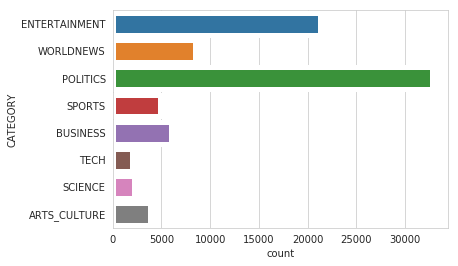

In [57]:
sns.countplot(y=myNewsDataset.CATEGORY,linewidth=5,)

In [58]:
len(myNewsDataset.CATEGORY)


81222

In [59]:
value_counts=myNewsDataset.CATEGORY.value_counts()
# int(value_counts)
for v in value_counts:
    print(int(v))

32700
21209
8417
5932
4884
3874
2178
2028


# Spliting The Dataset

In [60]:
train_set,test_set = train_test_split(myNewsDataset,test_size=0.2,random_state=42)

In [61]:
train_set.CATEGORY.value_counts()
# test_set.CATEGORY.value_counts()

POLITICS         26189
ENTERTAINMENT    16974
WORLDNEWS         6709
BUSINESS          4737
SPORTS            3923
ARTS_CULTURE      3084
SCIENCE           1732
TECH              1629
Name: CATEGORY, dtype: int64

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(myNewsDataset, myNewsDataset["Category_label"]):
    strat_train_set = myNewsDataset.iloc[train_index]
    strat_test_set = myNewsDataset.iloc[test_index]
strat_train_set.head()

,CATEGORY,data,Category_label
71201,ARTS_CULTURE,what experts got wrong about the relationship ...,5
180721,ENTERTAINMENT,i don give a rat ass about the republican nati...,1
40398,ARTS_CULTURE,artist chronicles her transition in hilarious ...,5
2480,POLITICS,coal baron subsidize coal ‘to make sure grandm...,0
25223,POLITICS,donald trump reportedly plans to withdraw from...,0


In [63]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16245 entries, 95713 to 111073
Data columns (total 3 columns):
CATEGORY          16245 non-null object
data              16245 non-null object
Category_label    16245 non-null int64
dtypes: int64(1), object(2)
memory usage: 507.7+ KB


In [64]:
# strat_train_set == is our training set
# strat_test_set == test set

# CountVectorizer

In [65]:
from sklearn.feature_extraction.text import CountVectorizer


In [66]:
cvec = CountVectorizer(stop_words="english")
x_train_data = cvec.fit(strat_train_set.data)
x_train_transform = cvec.transform(strat_train_set.data)
#transform the x_test data as per CountVectorizer from x_train data
x_test_transform = cvec.transform(strat_test_set.data)

In [67]:
x_train_transform

<64977x56656 sparse matrix of type '<class 'numpy.int64'>'
	with 911825 stored elements in Compressed Sparse Row format>

In [68]:
x_test_transform

<16245x56656 sparse matrix of type '<class 'numpy.int64'>'
	with 221898 stored elements in Compressed Sparse Row format>

In [69]:
y_train = strat_train_set.Category_label
y_test = strat_test_set.Category_label


<img src="03_bayes_rule_naive_bayes_new.png">

<img src="04_naive_bayes_interpretation_new.png">

# Multinomial NB

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [128]:
NBmodel = MultinomialNB()


In [129]:
# fitting
NBmodel.fit(x_train_transform,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [130]:
#Predicting x_test set
y_pred_class = NBmodel.predict(x_test_transform)

In [131]:
length=0
for i,j in zip(y_pred_class,y_test):
    length+=1
    print(i," -------- ",j)
    if length==5:
        break

0  --------  3
2  --------  2
0  --------  4
1  --------  1
0  --------  0


In [132]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.7980917205293937

In [133]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion_matrix)

[[5885  262  253  107   14   10    2    7]
 [ 391 3726   19   49   21   30    4    2]
 [ 314   62 1243   36    4   15    5    4]
 [ 268  104   36  752    7    8    0   11]
 [ 102  155   36   14  668    1    1    0]
 [  55  295   30   26    3  359    5    2]
 [  68   87   16   30    9    8  215    3]
 [  97   79   11   94    1    4    3  117]]


In [104]:
confusion_matrix.shape

(8, 8)

In [134]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_pred_class))


Classification report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6540
           1       0.78      0.88      0.83      4242
           2       0.76      0.74      0.75      1683
           3       0.68      0.63      0.66      1186
           4       0.92      0.68      0.78       977
           5       0.83      0.46      0.59       775
           6       0.91      0.49      0.64       436
           7       0.80      0.29      0.42       406

   micro avg       0.80      0.80      0.80     16245
   macro avg       0.81      0.63      0.69     16245
weighted avg       0.80      0.80      0.79     16245



In [81]:
# 'POLITICS':0,
# 'ENTERTAINMENT':1,
# 'WORLDNEWS':2,         
# 'BUSINESS':3,          
# 'SPORTS':4,            
# 'ARTS_CULTURE':5,      
# 'SCIENCE':6,           
# 'TECH':7

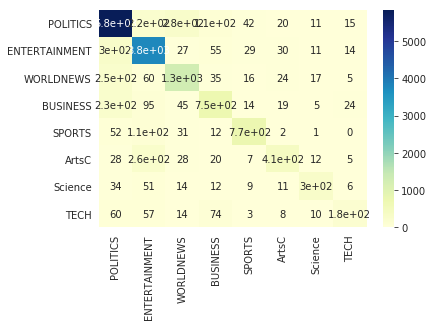

In [110]:
import seaborn as sns;
heat_map = sns.heatmap(confusion_matrix,cmap="YlGnBu",  annot=True,

                       xticklabels=["POLITICS","ENTERTAINMENT","WORLDNEWS","BUSINESS","SPORTS","ArtsC","Science","TECH"],
                       yticklabels=["POLITICS","ENTERTAINMENT","WORLDNEWS","BUSINESS","SPORTS","ArtsC","Science","TECH"])

In [ ]:
n_m = confusion_matrix / confusion_matrix.astype(np.float).sum(axis=1)

In [ ]:
clean_n_m=(np.around(n_m,decimals=3))
clean_n_m

In [ ]:
import seaborn as sns;

heat_map = sns.heatmap(clean_n_m,cmap="YlGnBu",
                       xticklabels=["POLITICS","ENTERTAINMENT","WORLDNEWS","BUSINESS","SPORTS","ArtsC","Science","TECH"],
                       yticklabels=["POLITICS","ENTERTAINMENT","WORLDNEWS","BUSINESS","SPORTS","ArtsC","Science","TECH"])

# My test

In [117]:
doc= ["Patriots' Cardona promoted to lieutenant in Navy Joe Cardona, who has spent his entire NFL career with the Patriots balancing his football and active-duty commitments, has been promoted to the rank of lieutenant in the U.S. Navy."]

In [118]:
docx = cvec.transform(doc)

In [119]:
print(docx)

  (0, 2302)	1
  (0, 5494)	1
  (0, 9035)	2
  (0, 9044)	1
  (0, 11159)	1
  (0, 16184)	1
  (0, 17327)	1
  (0, 19946)	1
  (0, 27332)	1
  (0, 29638)	2
  (0, 34214)	2
  (0, 34608)	1
  (0, 37370)	2
  (0, 39989)	2
  (0, 41056)	1
  (0, 47541)	1


In [120]:
docp = NBmodel.predict(docx)
docp

array([4])

In [121]:
# Pipeplines 
myNBmodel = Pipeline([('cvec',CountVectorizer(stop_words="english")),
                       ('clf',MultinomialNB()),
                     ])

In [122]:
myNBmodel.fit(strat_train_set.data,y_train)

Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [123]:
y_pred_class = myNBmodel.predict(strat_test_set.data)

In [124]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.7980917205293937

In [125]:
p =myNBmodel.predict(doc)

In [ ]:
import pickle

In [ ]:
# Saving model to disk
pickle.dump(myNBmodel, open('myNBmodel.pkl','wb'))


In [ ]:

# Loading model to compare the results
myNBmodel = pickle.load( open('myNBmodel.pkl','rb'))

In [ ]:
myNBmodel.predict(doc)

# Complement NB


- Now, for Complement Normal Naive Bayes, instead of calculating the likelihood of a word occuring in a class, we calculate the likelihood that it occurs in other classes. So, we would proceed to calculate the word-class dependencies
- So, the one with the lower probability (minimum value) is said to be the class it belongs to . We DON'T use the one with the maximum probability because for the Complement Naive Bayes Algorithm, we take it - a higher value - to mean that it is highly likely that a document with these words does NOT belong to that class.



In [76]:
from sklearn.naive_bayes import ComplementNB

In [135]:
pcomp = Pipeline([('tfidf', TfidfVectorizer(stop_words="english")),
               ('cnb',ComplementNB()),
              ])


In [136]:
pcomp.fit(strat_train_set.data,y_train)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...  vocabulary=None)), ('cnb', ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False))])

In [137]:
y_pred_class=pcomp.predict(strat_test_set.data)

In [138]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.809664512157587

In [139]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion_matrix)

[[5951  219  235   68   34   17    5   11]
 [ 339 3767   24   34   27   29    9   13]
 [ 355   58 1194   23   15   18   15    5]
 [ 321  102   46  664   16   16    2   19]
 [  77  120   25    8  745    2    0    0]
 [  43  280   27   19    6  385   10    5]
 [  52   50   14   11    6    7  291    5]
 [ 101   62   13   59    1    7    7  156]]


# ----count

In [140]:
# Pipeplines 
myCBmodel = Pipeline([('cvec',CountVectorizer(stop_words="english")),
                       ('clf',ComplementNB()),
                     ])

In [141]:
myCBmodel.fit(strat_train_set.data,y_train)


Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('clf', ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False))])

In [142]:
y_pred_class=myCBmodel.predict(strat_test_set.data)

In [143]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.8188365650969529

In [144]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion_matrix)

[[5843  225  277  107   42   20   11   15]
 [ 301 3775   27   55   29   30   11   14]
 [ 251   60 1275   35   16   24   17    5]
 [ 232   95   45  752   14   19    5   24]
 [  52  113   31   12  766    2    1    0]
 [  28  263   28   20    7  412   12    5]
 [  34   51   14   12    9   11  299    6]
 [  60   57   14   74    3    8   10  180]]


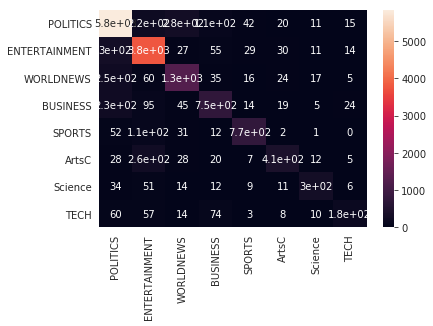

In [145]:
import seaborn as sns;
heat_map = sns.heatmap(confusion_matrix,color="Blue",annot=True,
                       xticklabels=["POLITICS","ENTERTAINMENT","WORLDNEWS","BUSINESS","SPORTS","ArtsC","Science","TECH"],
                       yticklabels=["POLITICS","ENTERTAINMENT","WORLDNEWS","BUSINESS","SPORTS","ArtsC","Science","TECH"])

In [146]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_pred_class))


Classification report
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6540
           1       0.81      0.89      0.85      4242
           2       0.75      0.76      0.75      1683
           3       0.70      0.63      0.67      1186
           4       0.86      0.78      0.82       977
           5       0.78      0.53      0.63       775
           6       0.82      0.69      0.75       436
           7       0.72      0.44      0.55       406

   micro avg       0.82      0.82      0.82     16245
   macro avg       0.79      0.70      0.74     16245
weighted avg       0.82      0.82      0.81     16245



In [107]:
import pickle


In [109]:
pickle.dump(myCBmodel, open('myCBmodel.pkl','wb'))


#  ---  GOOD BYE ---

# Support Vector Machine

In [163]:
from sklearn.svm import LinearSVC

In [169]:
sv = Pipeline([('Tfidf',TfidfVectorizer()),('svm',LinearSVC())])

In [170]:
sv

Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [171]:
sv.fit(strat_train_set.data,y_train)


Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [172]:
y_pred_class=sv.predict(strat_test_set.data)

In [173]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.8177285318559557

In [174]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion_matrix)

[[5854  255  228  125   31   13   10   24]
 [ 329 3703   23   46   46   63   12   20]
 [ 281   59 1243   44   17   15   13   11]
 [ 209   84   55  772   14   12    8   32]
 [  73   99   28   14  759    1    1    2]
 [  56  205   22   26    3  452    9    2]
 [  50   52   12   15    6    6  291    4]
 [  56   50   16   58    3    6    7  210]]


In [175]:
# Classification report
print("Classification report")
print(classification_report(y_test,y_pred_class))


Classification report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6540
           1       0.82      0.87      0.85      4242
           2       0.76      0.74      0.75      1683
           3       0.70      0.65      0.68      1186
           4       0.86      0.78      0.82       977
           5       0.80      0.58      0.67       775
           6       0.83      0.67      0.74       436
           7       0.69      0.52      0.59       406

   micro avg       0.82      0.82      0.82     16245
   macro avg       0.79      0.71      0.75     16245
weighted avg       0.82      0.82      0.81     16245



# ---Logistic Regeresssion---

In [148]:
from sklearn.linear_model import LogisticRegression


In [149]:
lr= LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=8, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)




/home/felladog/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7953216374269005

In [ ]:
lr.fit(x_train_transform,y_train)



In [151]:
y_pred_class = lr.predict(x_test_transform)


In [152]:

# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.7953216374269005

In [157]:

sv = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf',LogisticRegression(C=1.0, class_weight='balanced',
                dual=False,fit_intercept=True, intercept_scaling=1,
                max_iter=100,multi_class='multinomial', n_jobs=1,
                penalty='l2',random_state=8, solver='sag', tol=0.0001, verbose=0,warm_start=False))
              ])
               

In [158]:
sv.fit(strat_train_set.data,y_train)


/home/felladog/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...y='l2',
          random_state=8, solver='sag', tol=0.0001, verbose=0,
          warm_start=False))])

In [160]:
y_pred_class=sv.predict(strat_test_set.data)

In [161]:
# measuring accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.7889196675900277